<a href="https://colab.research.google.com/github/Yoojin730/20-2_DL_code/blob/main/210117_NETFLIX_EDA_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🎬 Netflix EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as msno

import warnings
warnings.filterwarnings("ignore")

In [2]:
plt.rc('font', size=12) #controls default text sizes
plt.rc('axes', titlesize=14) #fontsize of the axes title
plt.rc('axes', labelsize=12) #fontsize of the x and y labels
plt.rc('xtick', labelsize=12) #fontsize of the tick labels
plt.rc('ytick', labelsize=12) #fontsize of the tick labels
plt.rc('legend', fontsize=12) #legend fontsize
plt.rc('figure', titlesize=14) #fontsize of the figure title
plt.rcParams['figure.dpi'] = 300 #high resolution
sns.set_style('whitegrid')

데이터 형태/ 결측치 확인

In [4]:
data = pd.read_csv('/content/drive/MyDrive/YBIGTA/복습스터디/0117_복습_스터디/netflix_titles.csv')

print(data.shape)

(6234, 12)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


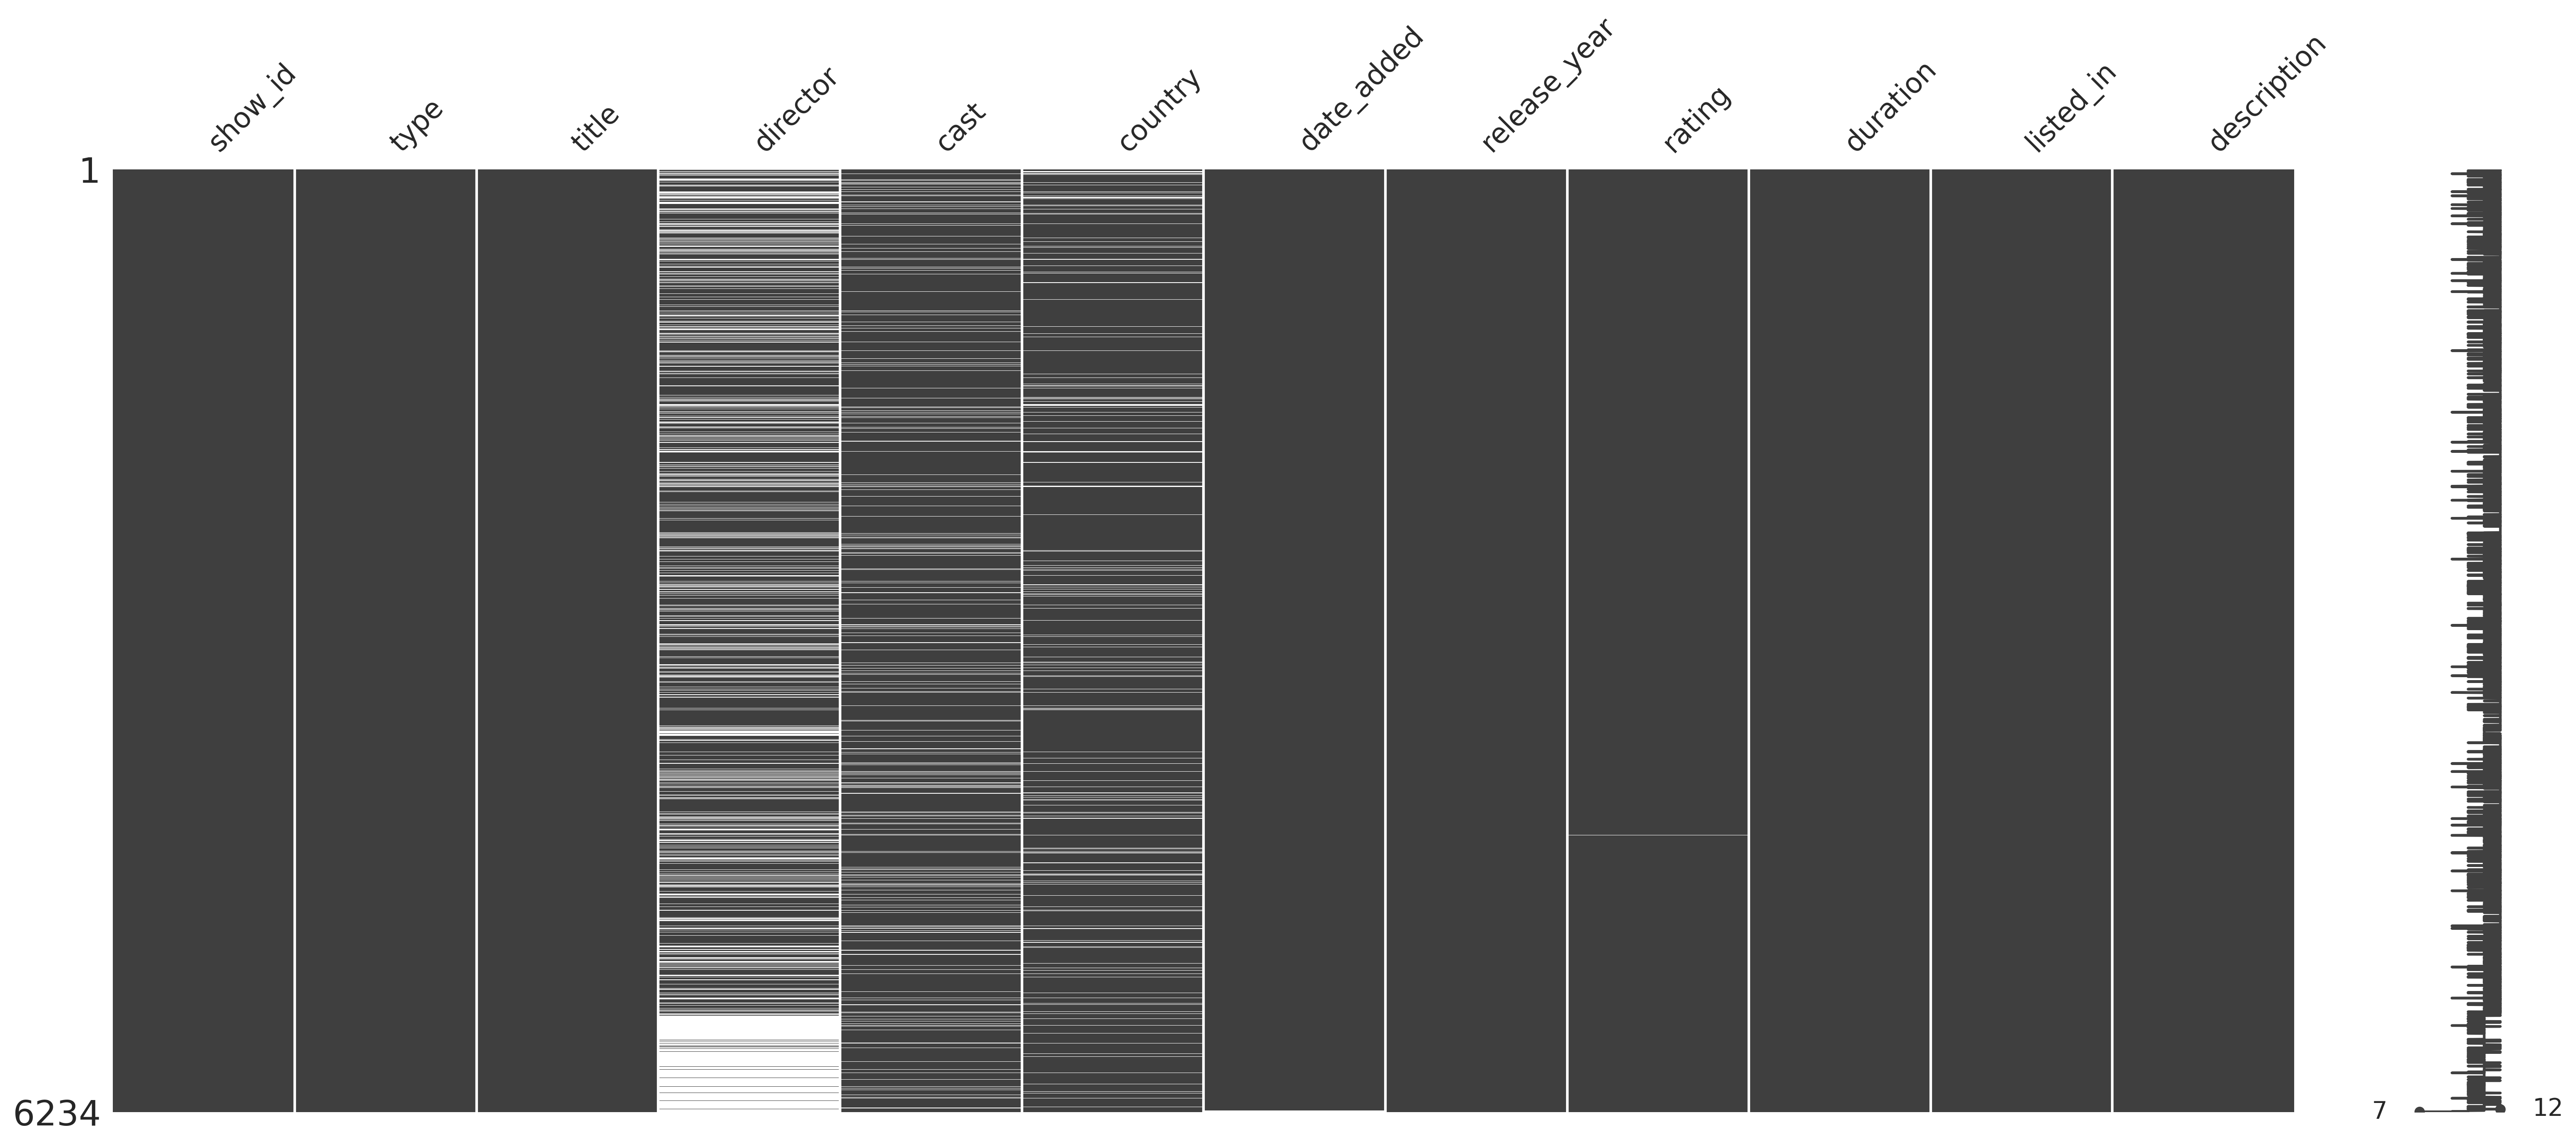

In [5]:
msno.matrix(data)
plt.show()

In [ ]:
for i in data.columns:
    null_rate = data[i].isna().sum() / len(data) * 100 
    if null_rate > 0 :
        print(f"{i}'s null rate : {null_rate}%")

director's null rate : 31.584857234520374%
cast's null rate : 9.143407122232915%
country's null rate : 7.635547000320821%
date_added's null rate : 0.17645171639396856%
rating's null rate : 0.16041065126724416%


# 어느 컬럼이 많은 결측치를 가지고 있나요?

`director` - `cast` - `country`

In [7]:
data.describe(include='all').head(4)

#추가로 입력인수로 include='all'을 넣어주면 문자열 데이터가 있는 열에 대한 추가정보를 제공한다.
#정확히는 고유값 개수(unique), 최빈값(top), 빈도수(freq)이다.
#숫자형 열에 대해서는 NaN인 것을 알 수 있다.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,6234.0,6234,6234,4265,5664,5758,6223,6234.0,6224,6234,6234,6234
unique,NaN,2,6172,3301,5469,554,1524,NaN,14,201,461,6226
top,NaN,Movie,Love,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,A surly septuagenarian gets another chance at ...
freq,NaN,4265,3,18,18,2032,122,NaN,2027,1321,299,3


결측치가 있는 변수들의 데이터 타입은 무엇이었나요? 해당 컬럼의 결측치를 0으로 채워주는 것이 적절할까요?

적절한 결측치 보완을 해주세요 :)


In [8]:
data = data.fillna('NULL')

In [10]:
#September 9, 2019

data['year_added'] = data['date_added'].apply(lambda x :  x.split(',')[-1])
data['year_added'] = data['year_added'].apply(lambda x : x if x != 'NULL' else '2020')
data['year_added'] = data['year_added'].apply(int)

영화와 tv쇼 작품을 따로 분리해 `movie` 와 `TV Show` 라는 이름의 데이터프레임으로 만들기


In [11]:
movie = data[data['type'] == 'Movie']
tv_show = data[data['type'] == 'TV Show']

## 왜 넷플릭스의 점유율이 상승했을까요?

참고: 여러 넷플릭스의 이벤트들

    "Launch Streaming Video - 2007.1",
    "Expanding Streaming Service\nStarting with Candata - 2010.11",
    "Expanding to Europe - 2012.1",
    "First Original Content - 2013.2",
    "Expanding to Japan - 2015.9",
    "Original targeting Kids - 2016/1",
    "Offline Playback Features to all of Users - 2016/11"


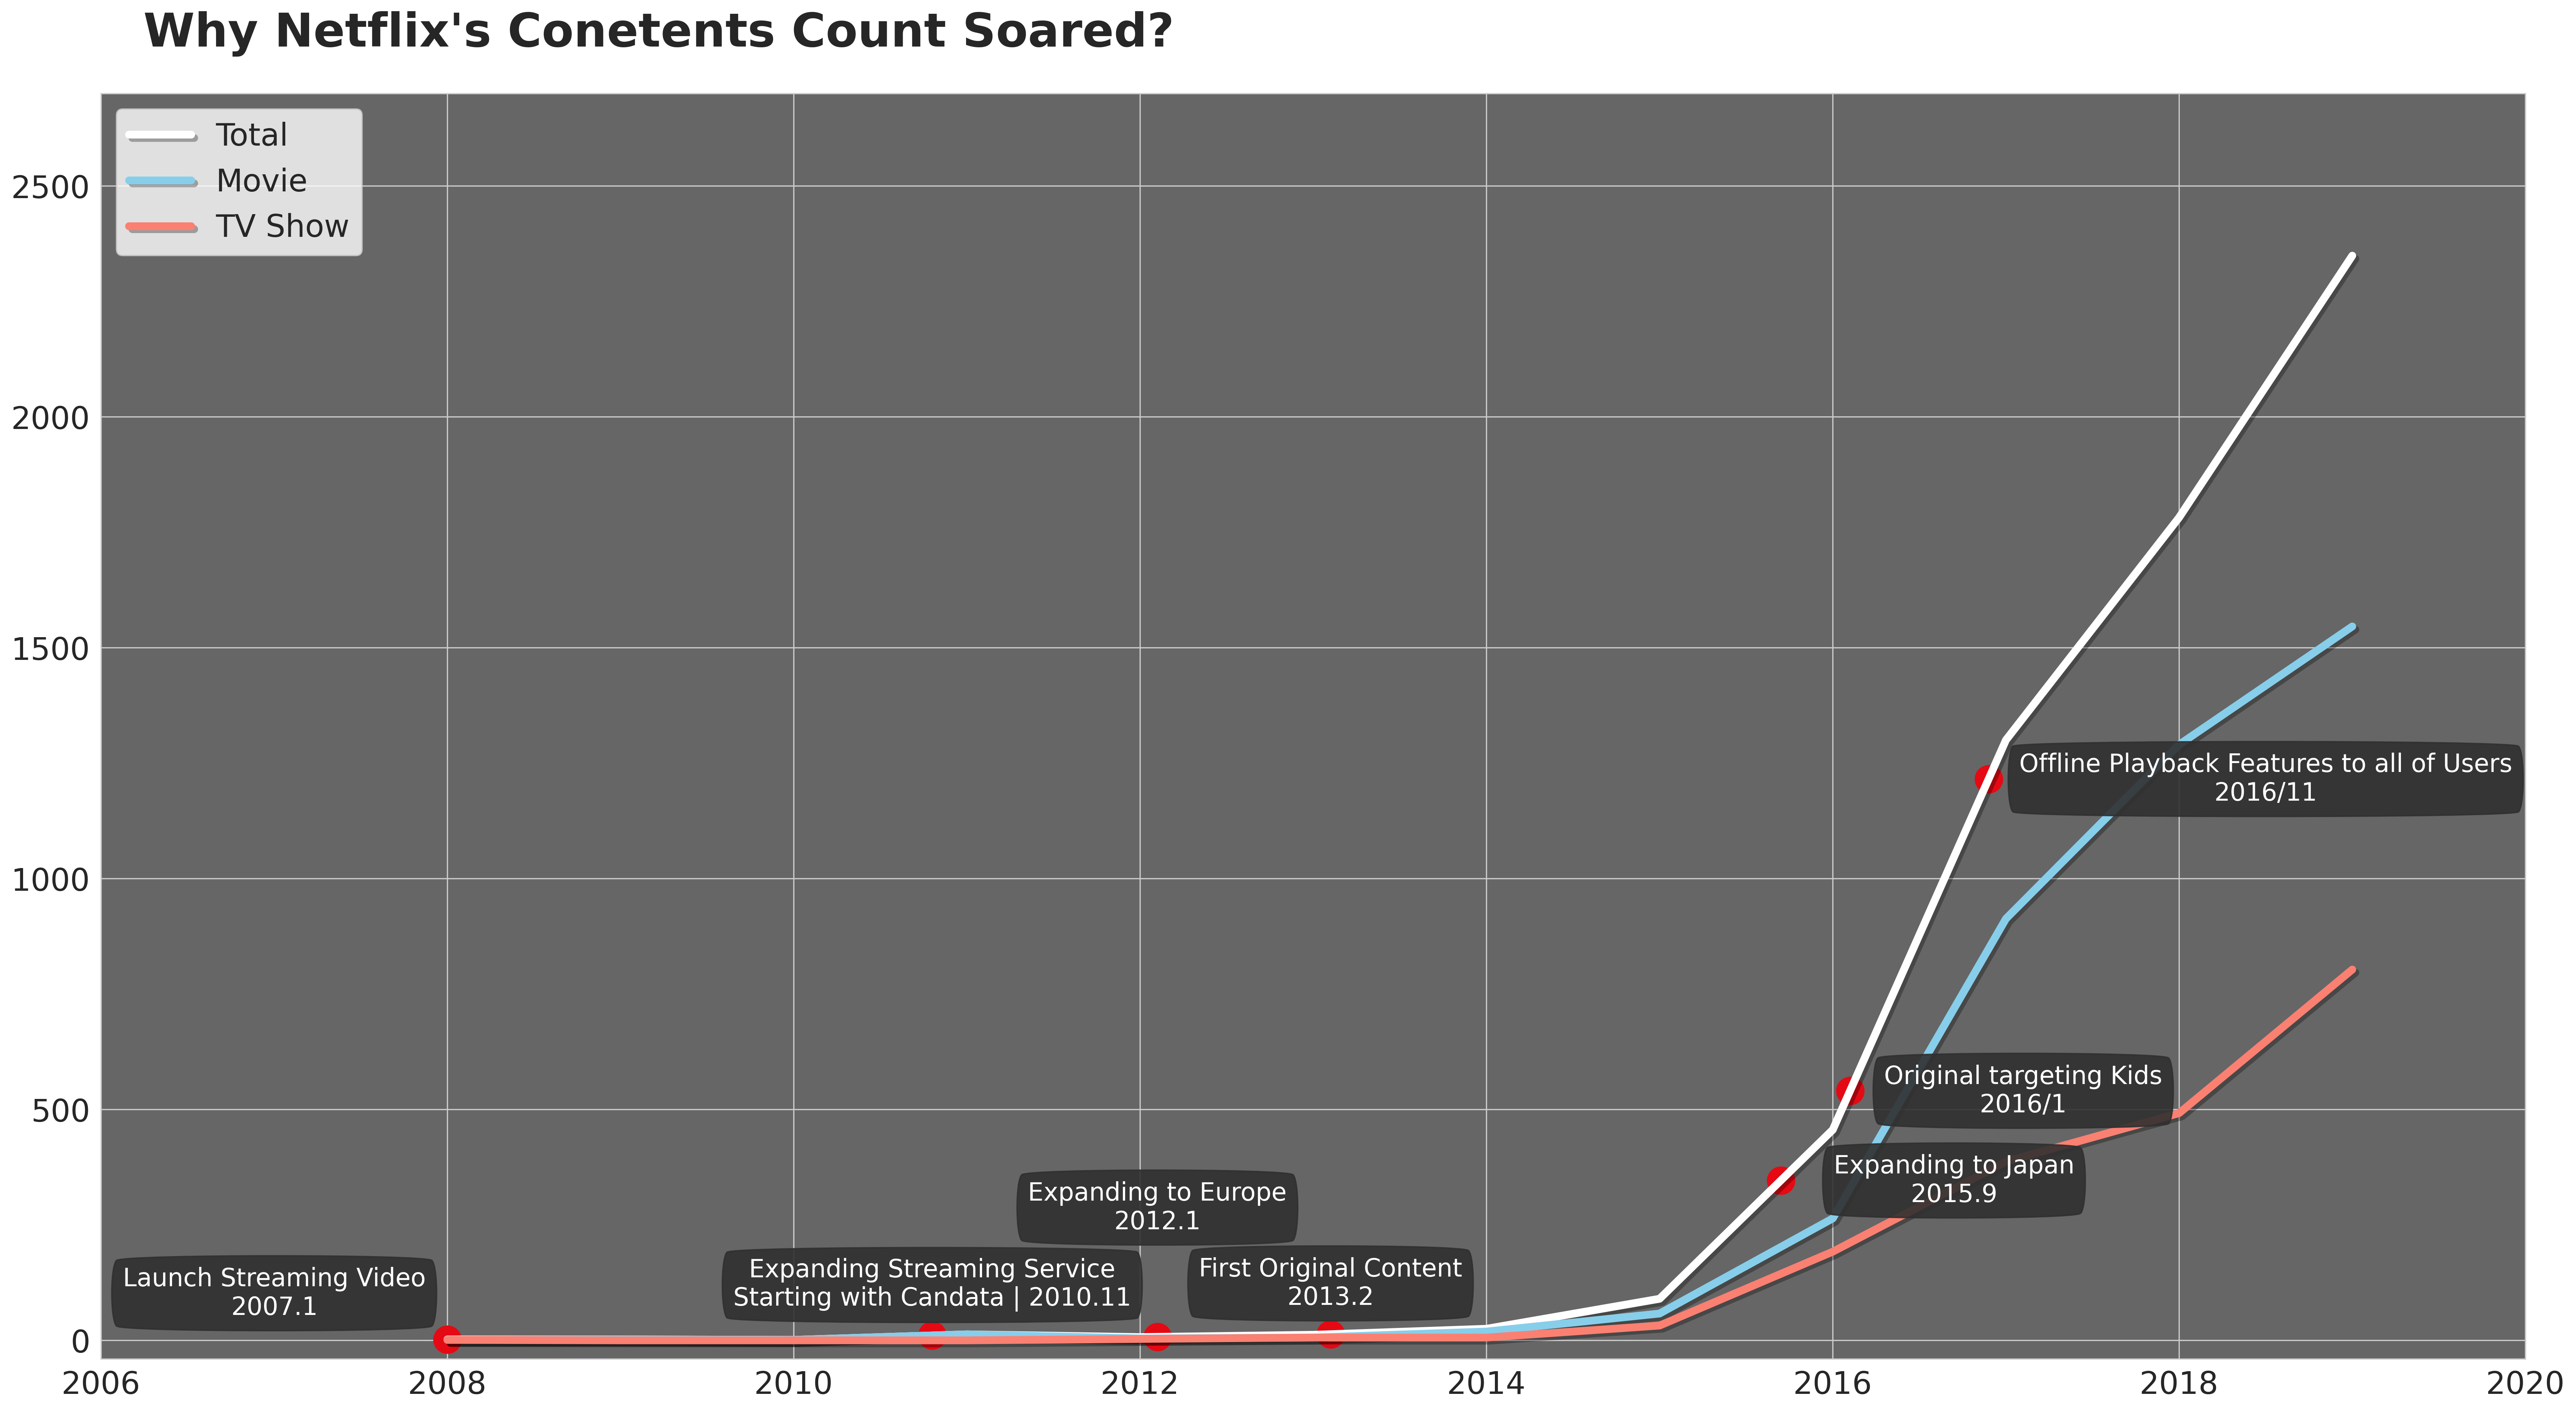

In [17]:
import matplotlib.patheffects as path_effects

year_data = data['year_added'].value_counts().sort_index().loc[:2019]
type_data = data.groupby('type')['year_added'].value_counts().sort_index().unstack().fillna(0).T.loc[:2019] 

fig, ax = plt.subplots(1,1, figsize=(28, 15))
ax.plot(year_data.index, year_data,  color="white", linewidth=5, label='Total', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
ax.plot(type_data.index, type_data['Movie'], color='skyblue', linewidth=5, label='Movie', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
ax.plot(type_data.index, type_data['TV Show'], color='salmon', linewidth=5, label='TV Show', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])

ax.set_xlim(2006, 2020)
ax.set_ylim(-40, 2700)

t = [
    2008,
    2010.8,
    2012.1,
    2013.1,
    2015.7,
    2016.1,
    2016.9
]

events = [
    "Launch Streaming Video\n2007.1",
    "Expanding Streaming Service\nStarting with Candata | 2010.11",
    "Expanding to Europe\n2012.1",
    "First Original Content\n2013.2",
    "Expanding to Japan\n2015.9",
    "Original targeting Kids\n2016/1",
    "Offline Playback Features to all of Users\n2016/11"
]

up_down = [100, 110, 280, 110, 0, 0, 0]

left_right = [ -1, 0, 0, 0, 1, 1, 1.6 ]

for t_i, event_i, ud_i, lr_i in zip(t, events, up_down, left_right):
    ax.annotate(event_i,
                xy=(t_i + lr_i, year_data[int(t_i)] * (int(t_i+1)-t_i) + year_data[int(t_i)+1]  * (t_i-int(t_i)) + ud_i),
                xytext=(0,0), textcoords='offset points',
                va="center", ha="center",
                color="w", fontsize=16,
                bbox=dict(boxstyle='round4', pad=0.5, color='#303030', alpha=0.90))
    
    # A proportional expression to draw the middle of the year
    ax.scatter(t_i, year_data[int(t_i)] * (int(t_i+1)-t_i) + year_data[int(t_i)+1]  * (t_i-int(t_i)), color='#E50914', s=300)

ax.set_facecolor((0.4, 0.4, 0.4))
ax.set_title("Why Netflix's Conetents Count Soared?", position=(0.23, 1.0+0.03), fontsize=30, fontweight='bold')
ax.yaxis.set_tick_params(labelsize=20)
ax.xaxis.set_tick_params(labelsize=20)
plt.legend(loc='upper left', fontsize=20)

plt.show()

## 어떤 나라가 가장 많은 콘텐츠를 생산할까요?

`country` 컬럼을 먼저 다뤄봅시다.

`country` 컬럼에는 여러 나라가 한번에 들어가 있기도 합니다. 
각 나라별로 작품 수를 세기 위해서는 어떤 방법을 사용할 수 있을까요?

상위 20위 나라들을 찾아봅시다.

tip: counter 함수를 통해 개수를 셀 수 있습니다. but 다른 방법이 많으니 pandas를 이용해 많이 시도해보세요.

from collections import Counter

In [12]:
from collections import Counter
country_data = data['country']
country_counting = pd.Series(dict(Counter(','.join(country_data).replace(' ,',',').replace(', ',',').split(',')))).sort_values(ascending=False)
country_counting.drop(['NULL'], axis=0, inplace=True)
tot = sum(country_counting)
top20 = sum(country_counting[:20]) # 22 is real 20% but for simple processing

print(f'total : {tot}')
print(f'top 20 countries : {top20}')
print(f'percentage : {top20}/{tot} = {100 * top20/tot}')

total : 7182
top 20 countries : 6318
percentage : 6318/7182 = 87.96992481203007


### Bar Plot & Pie Plot

상위 20개 나라를 top_20_country 라는 이름의 series로 저장해주세요.
index가 나라명, value가 작품수

In [13]:
top20_country = country_counting[:20]

In [14]:
top20_country

United States     2610
India              838
United Kingdom     602
Canada             318
France             271
Japan              231
Spain              178
South Korea        162
Germany            151
Mexico             129
Australia          126
China              120
Hong Kong           97
Turkey              87
Taiwan              75
Argentina           68
Italy               67
Brazil              66
Belgium             66
Thailand            56
dtype: int64

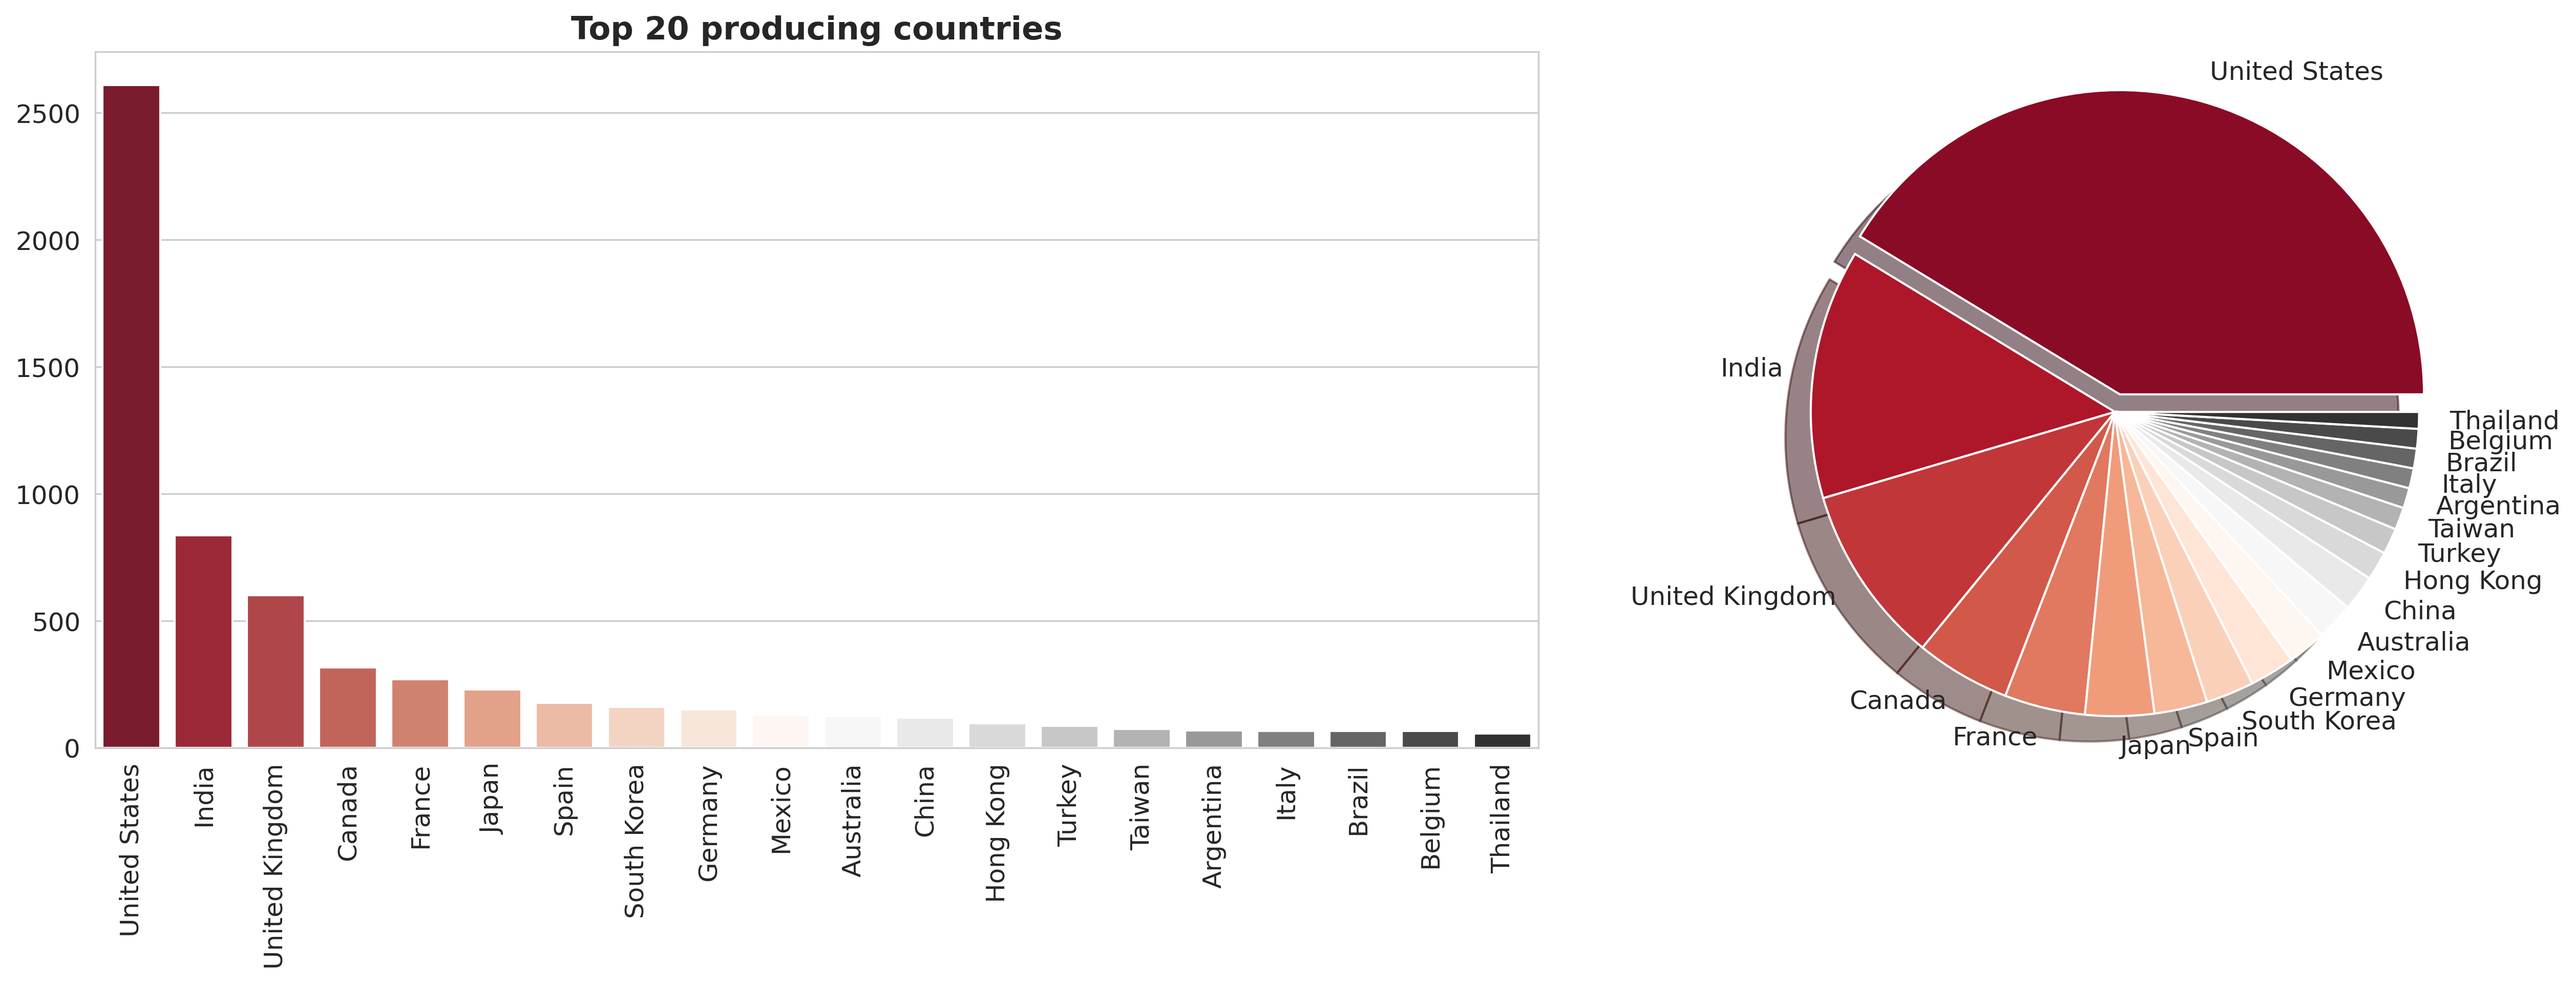

In [15]:
from matplotlib import gridspec

fig = plt.figure(figsize=(20, 6))
gs = gridspec.GridSpec(nrows=1, ncols=2, #여러 플롯보여줄 때 설정하는 패키지입니다.
                       height_ratios=[6], 
                       width_ratios=[10, 5])


ax = plt.subplot(gs[0]) #첫번째 플롯 이름
sns.barplot(top20_country.index, top20_country, ax=ax, palette="RdGy")
ax.set_xticklabels(top20_country.index, rotation='90')
ax.set_title('Top 20 producing countries', fontsize=15, fontweight='bold')

explode = [0 for _ in range(20)]
explode[0] = 0.06

ax2 = plt.subplot(gs[1]) #두번째 플롯 이름
ax2.pie(top20_country, labels=top20_country.index,
        shadow=True, startangle=0, explode=explode,
        colors=sns.color_palette("RdGy", n_colors=20)
       )
ax2.axis('equal') 

plt.show()

## 장르와 movie/tv show와의 관계

이번에는 데이터만 넣으면 장르당 타입과 플롯을 뱉어내는 함수를 만들어봐요!
여러 비슷한 플롯을 만들때는 이게 편하겠죠?
함수의 첫번째 인수는 들어오는 데이터프레임, 두번째 인수는 플롯의 제목입니다.

In [16]:
def relation_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print(f"There are {len(Types)} types in the Netflix {title} Dataset")    
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(15, 14))
    pl = sns.heatmap(corr, mask=mask, cmap= "coolwarm", vmax=.5, vmin=-.5, center=0, square=True, linewidths=.7, cbar_kws={"shrink": 0.6})
    
    plt.show()

### Movie Genre Relatation

There are 20 types in the Netflix Movie Dataset


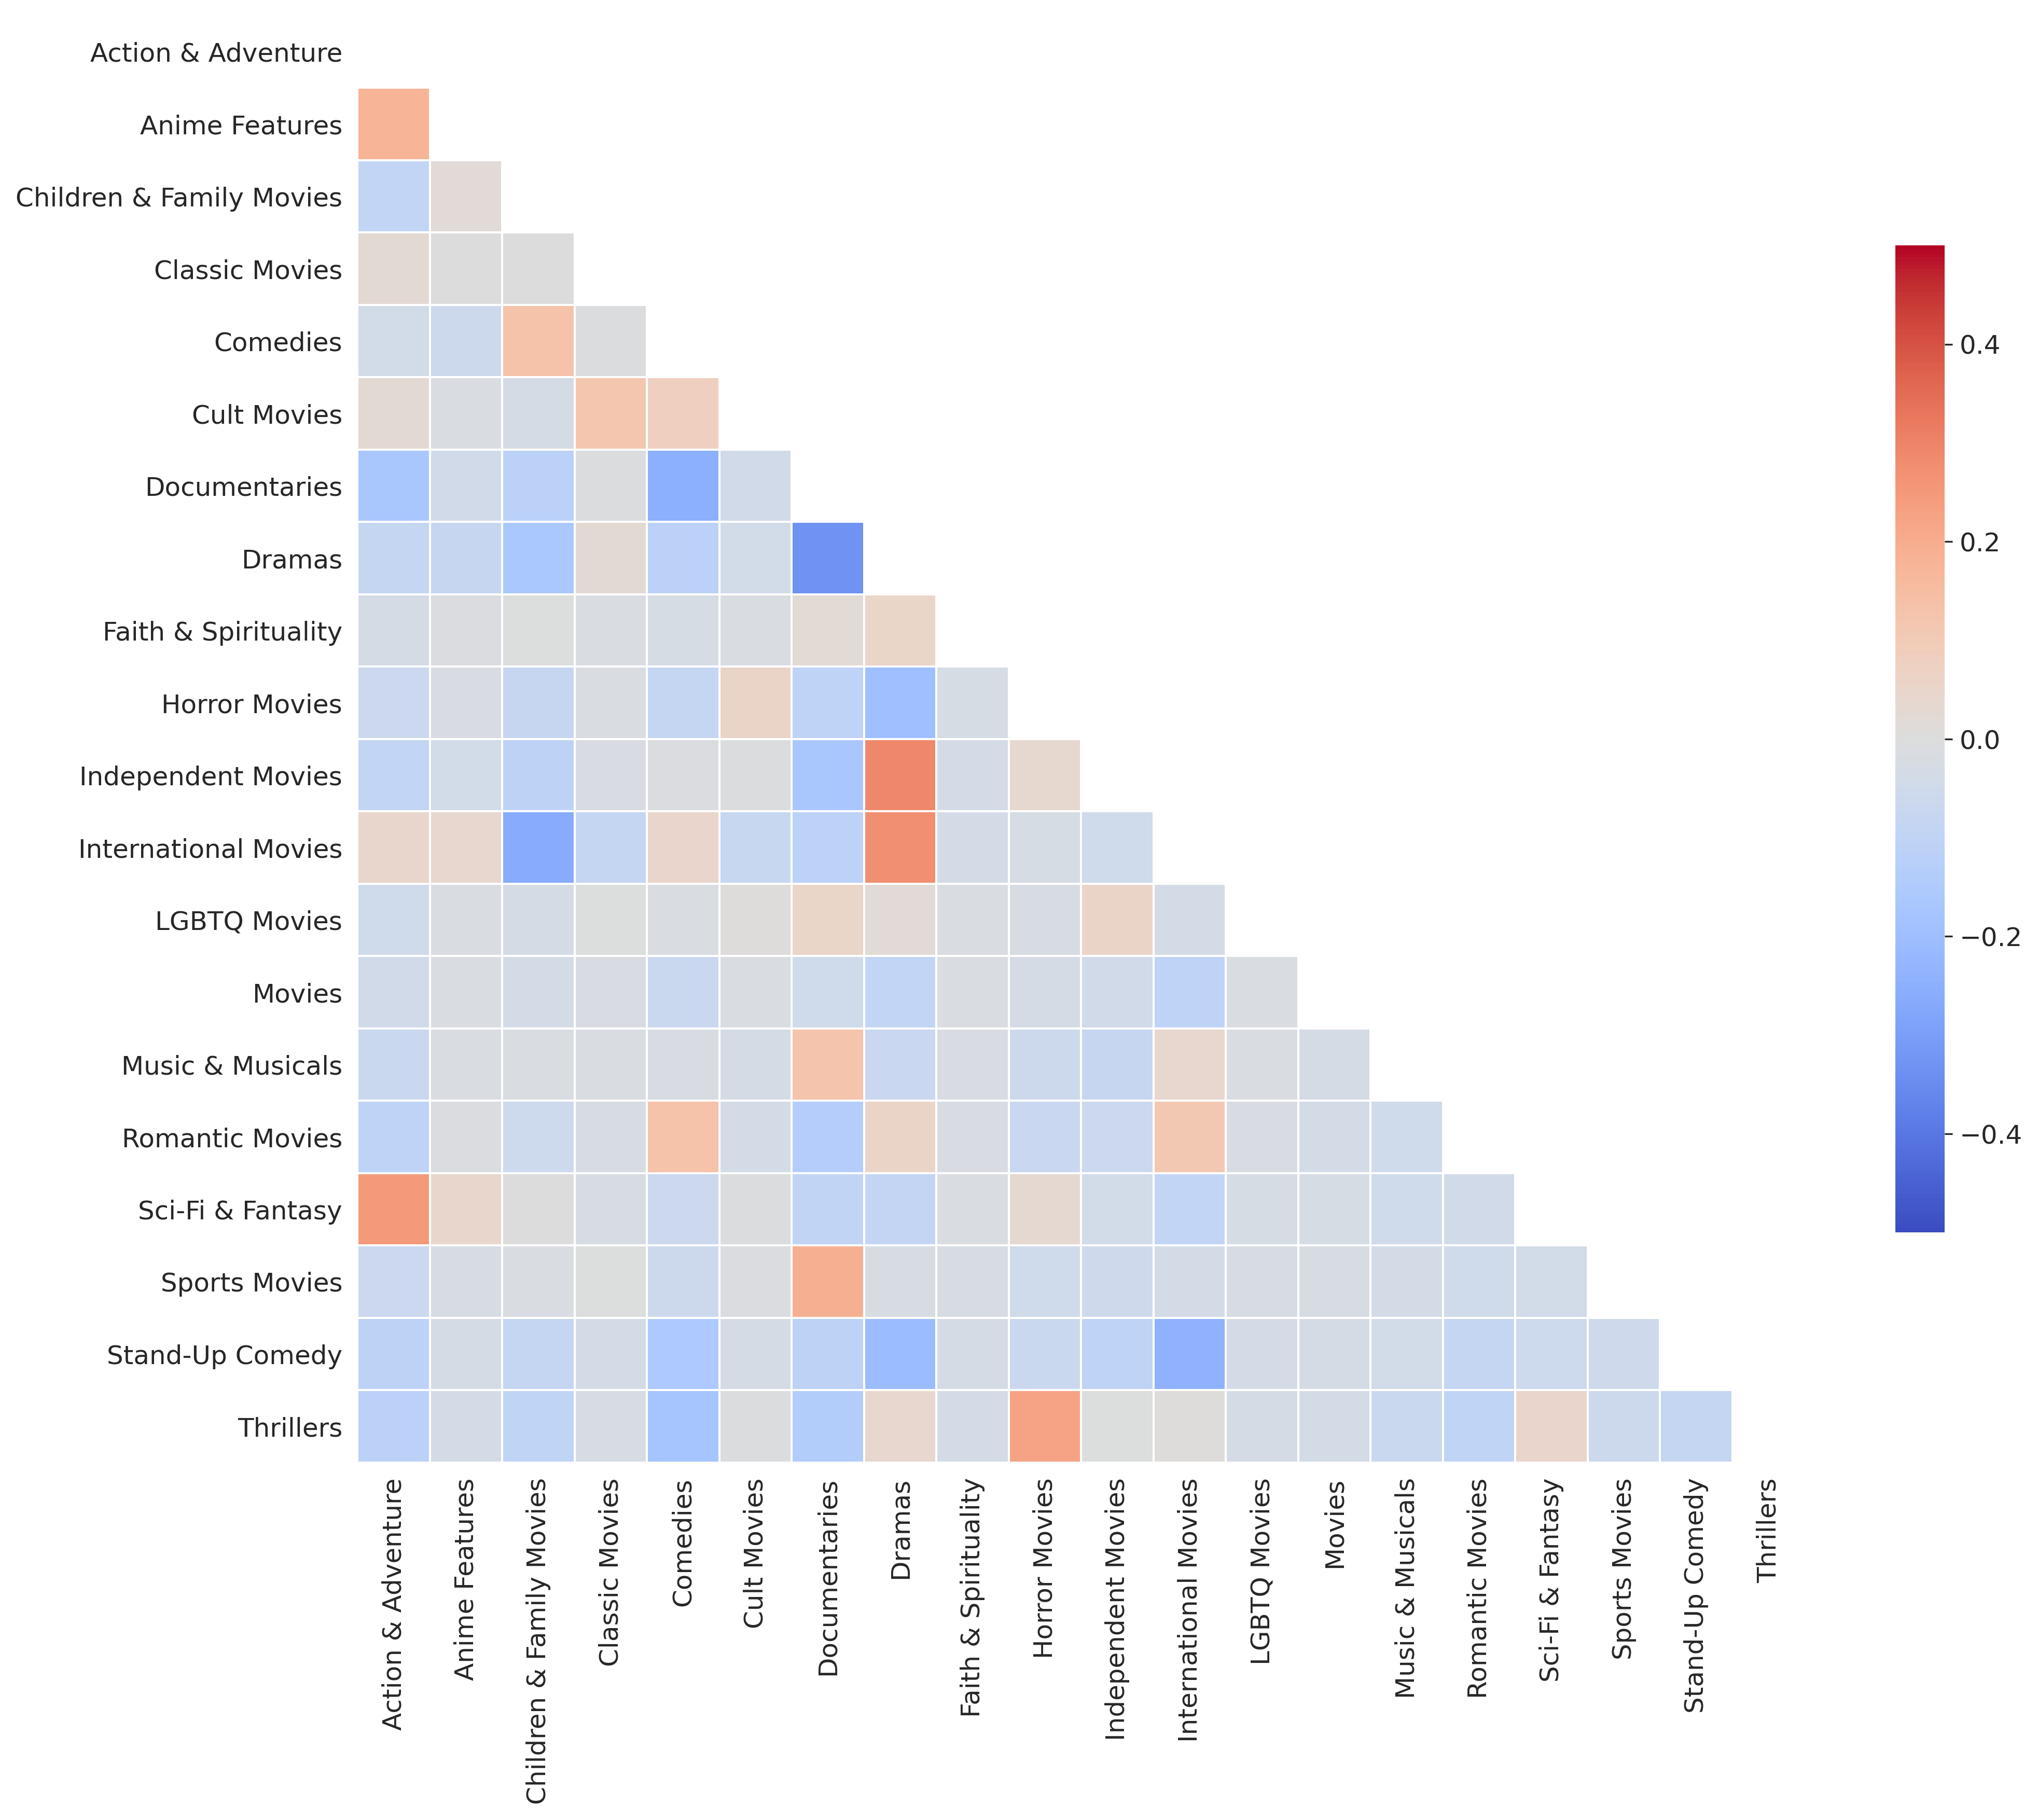

In [20]:
from sklearn.preprocessing import MultiLabelBinarizer
relation_heatmap(movie, 'Movie')

### TV Show Genre Relation

There are 22 types in the Netflix TV Show Dataset


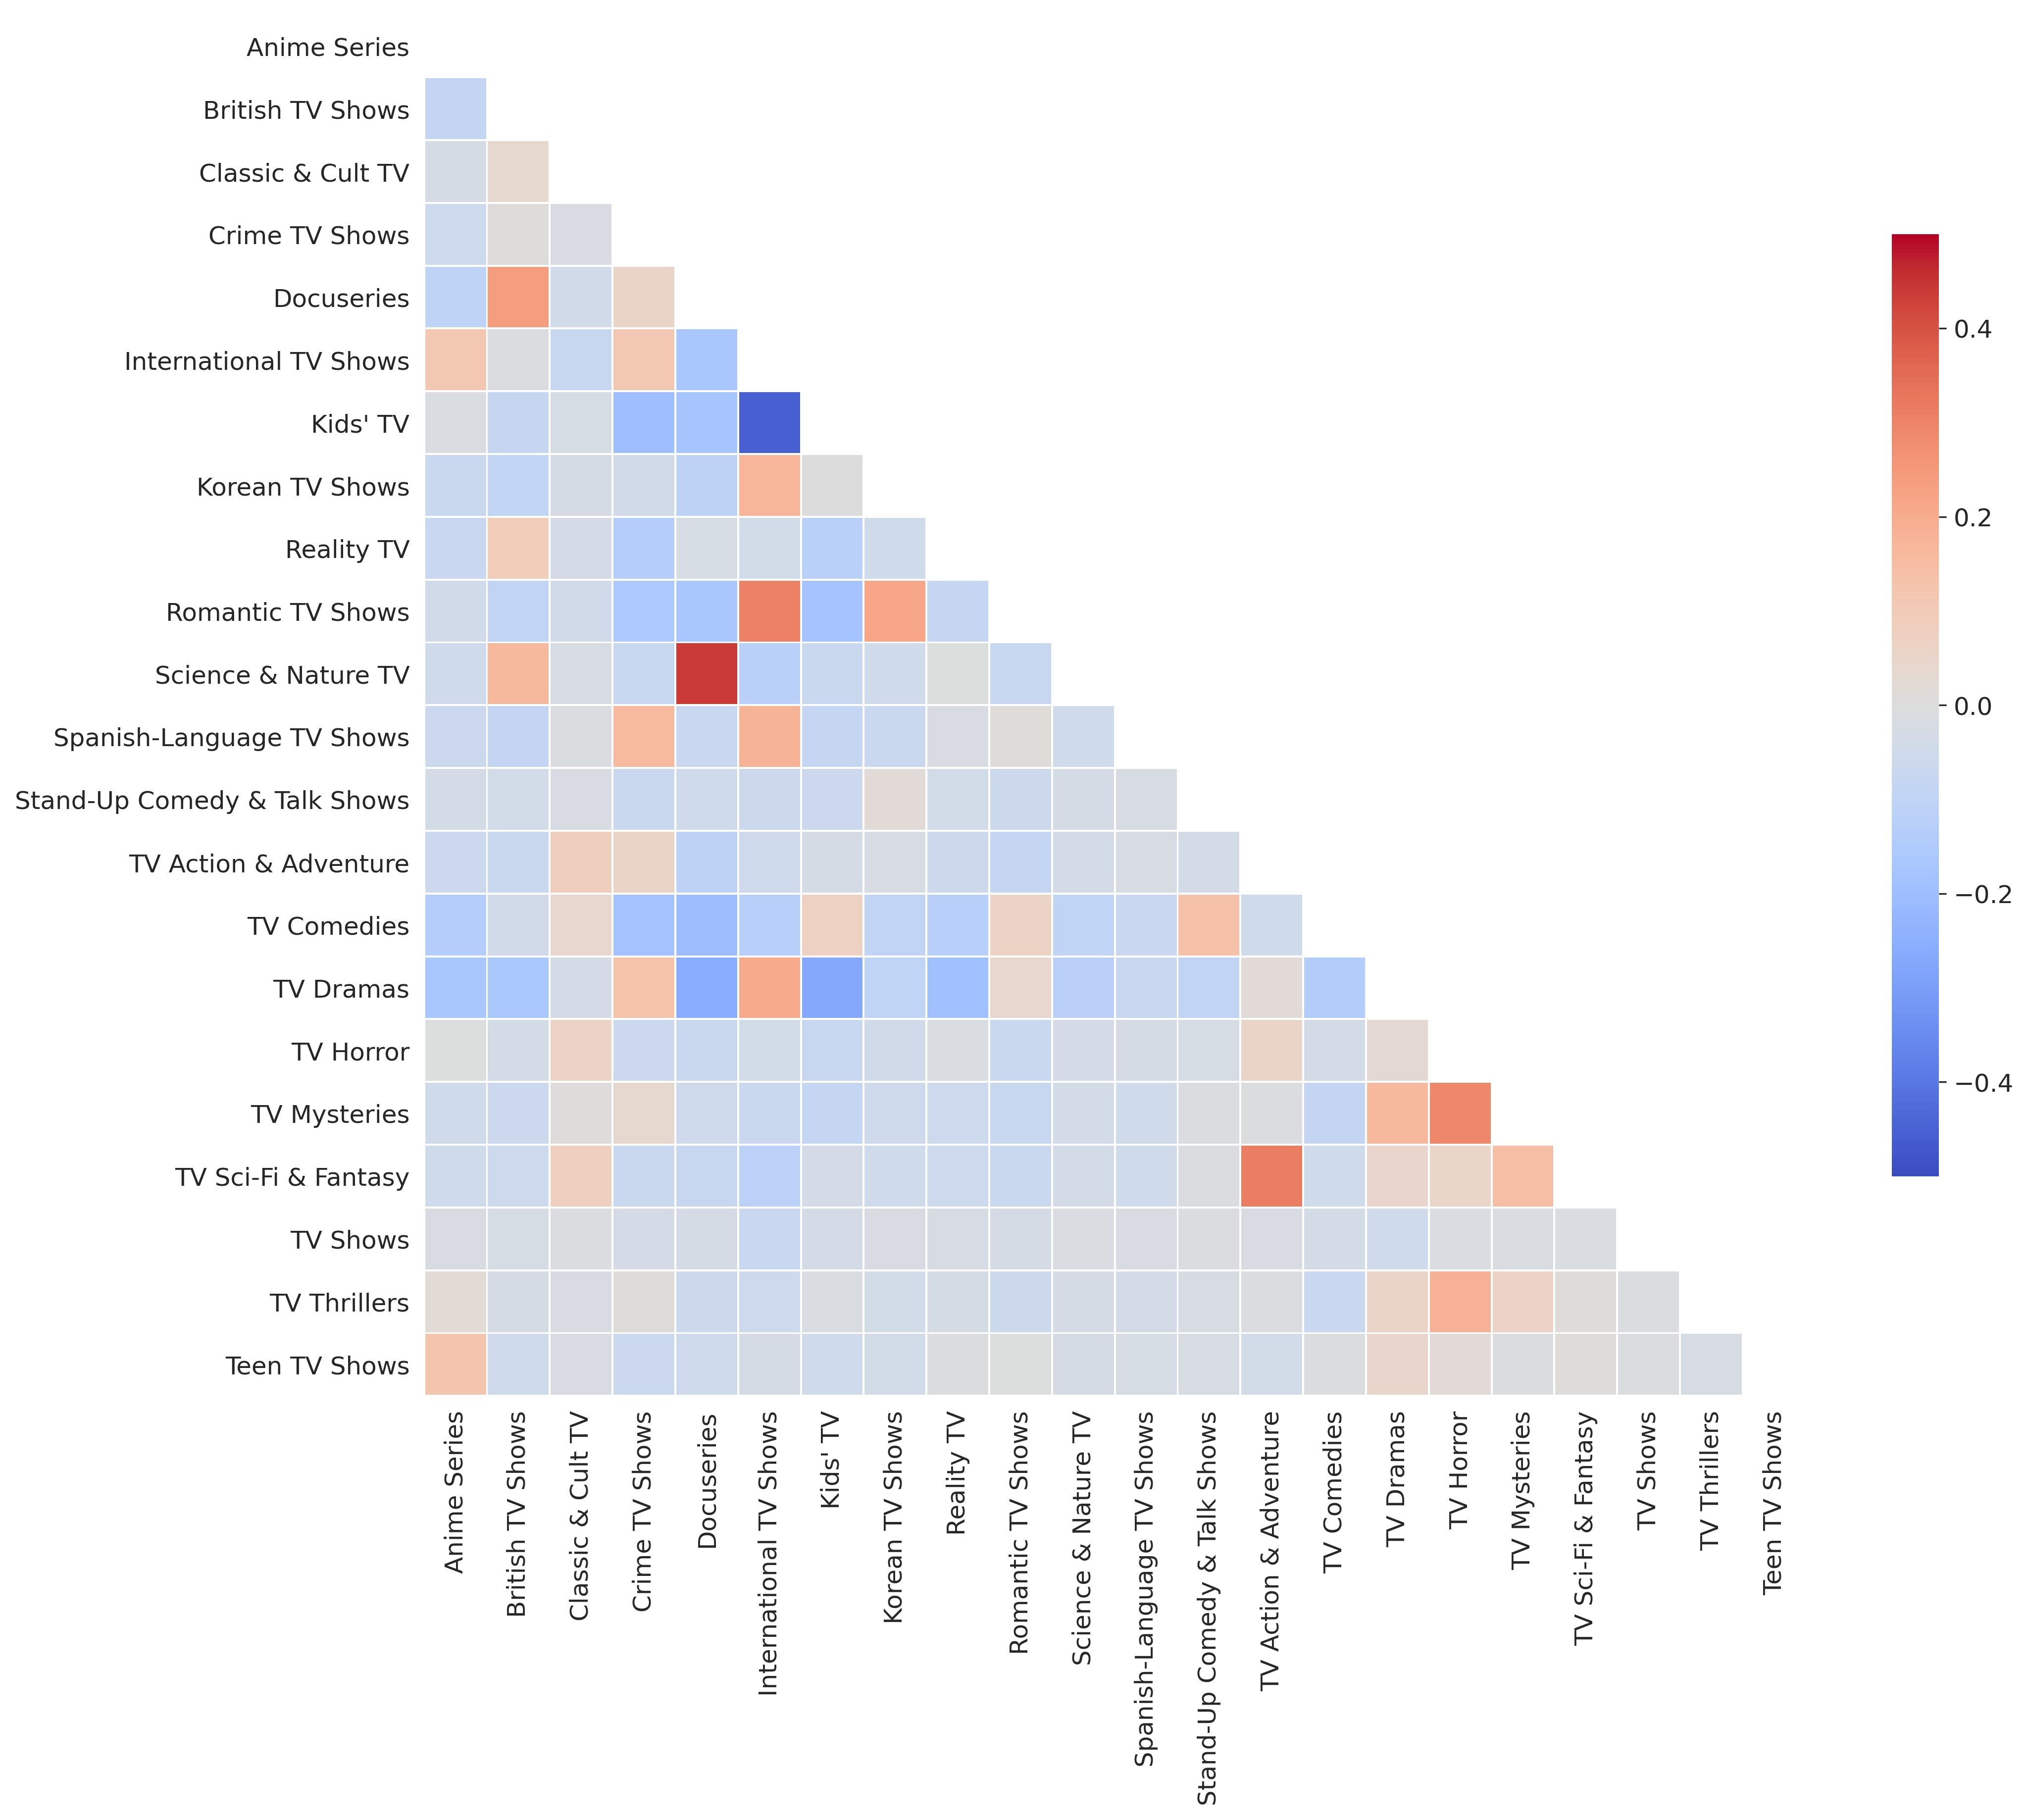

In [22]:
relation_heatmap(tv_show, 'TV Show')

## 월(月)과 연도의 상관관계

heatmap이 아닌 빈도수를 컬러로 보여주는 plt.colorbar() 차트입니다!

date_added 에서 year와 month를 분리해 제작하면 됩니다!

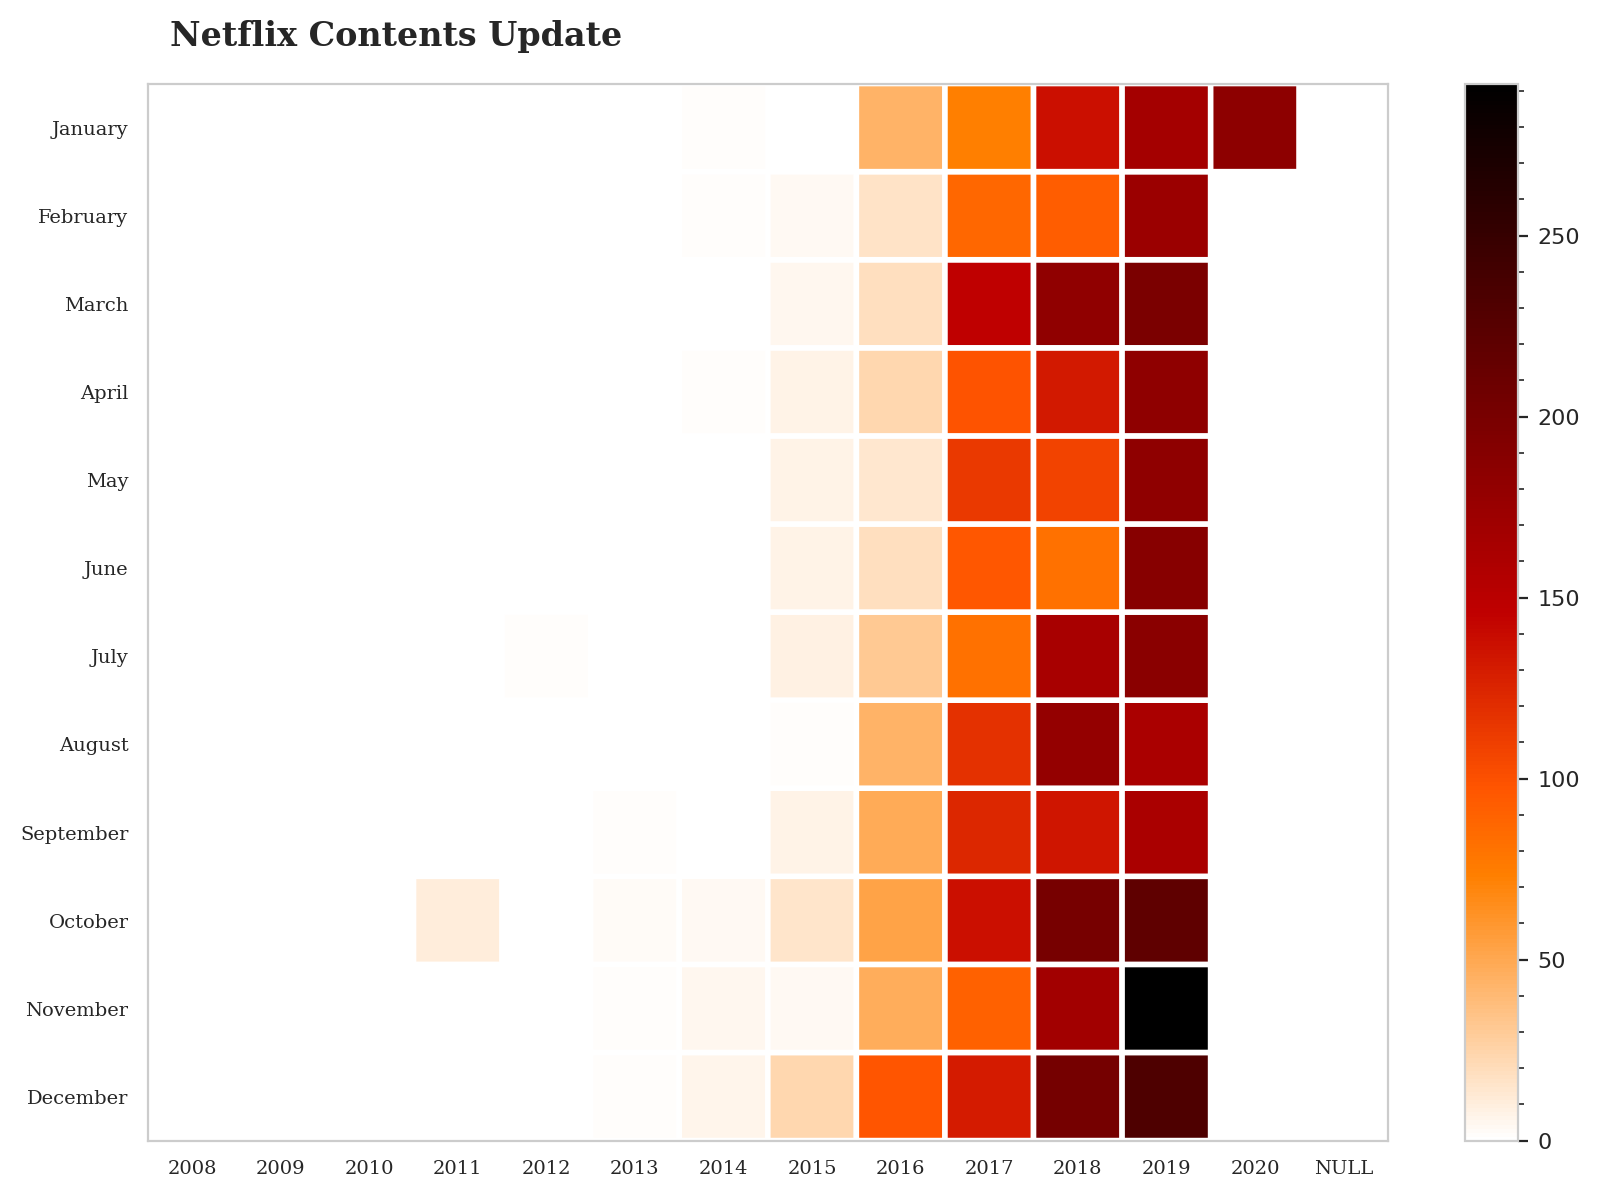

In [21]:
netflix_date = data[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='gist_heat_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='serif', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()